In [1]:
%%capture
!pip install pandas, matplotlib

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
df = pd.read_csv('/content/frota_veicular_goias.csv', encoding= 'latin-1', sep=';')

In [9]:
df.head(2)

,MUNICIPIO,ESPECIE,COR,FABR_ANTES_2000,FABR_2001A2010,FABR_2011A2020,FABR_DEPOIS_2021,COMBUSTIVEL,SITUACAO,QTD
0,AGUAS LINDAS DE GOIAS,MOTOCICLETA,PRETA,0,54,0,0,GASOLINA,Frota Inativa,54
1,GOIANIA,REBOQUE,PRETA,0,0,67,0,NAO INFORMADO,Frota Inativa,67


In [11]:
df.tail(2)

,MUNICIPIO,ESPECIE,COR,FABR_ANTES_2000,FABR_2001A2010,FABR_2011A2020,FABR_DEPOIS_2021,COMBUSTIVEL,SITUACAO,QTD
467913,CAMPESTRE DE GOIAS,MOTOCICLETA,PRATA,0,0,1,0,ALCOOL/GASOLINA,Frota Ativa,1
467914,MARZAGAO,AUTOMOVEL,VERMELHA,1,0,0,0,ALCOOL,Frota Inativa,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467915 entries, 0 to 467914
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   MUNICIPIO         467915 non-null  object
 1   ESPECIE           467915 non-null  object
 2   COR               467915 non-null  object
 3   FABR_ANTES_2000   467915 non-null  int64 
 4   FABR_2001A2010    467915 non-null  int64 
 5   FABR_2011A2020    467915 non-null  int64 
 6   FABR_DEPOIS_2021  467915 non-null  int64 
 7   COMBUSTIVEL       467915 non-null  object
 8   SITUACAO          467915 non-null  object
 9   QTD               467915 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 35.7+ MB


In [13]:
df.describe()

,FABR_ANTES_2000,FABR_2001A2010,FABR_2011A2020,FABR_DEPOIS_2021,QTD
count,467915.000000,467915.000000,467915.000000,467915.000000,467915.000000
mean,2.386220,3.059618,3.557071,1.627849,10.630758
std,26.529326,45.354395,64.869615,36.451955,90.636544
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,0.000000,0.000000,5.000000
max,3179.000000,9880.000000,11915.000000,7676.000000,11915.000000


In [14]:
df.columns

Index(['MUNICIPIO', 'ESPECIE', 'COR', 'FABR_ANTES_2000', 'FABR_2001A2010',
       'FABR_2011A2020', 'FABR_DEPOIS_2021', 'COMBUSTIVEL', 'SITUACAO', 'QTD'],
      dtype='object')

In [17]:
# Perguntas?

# Qual a quantidade de veículos ativos_na frota?

quantidade_veiculos_ativos = len(list(df[df['SITUACAO'] == 'Frota Inativa']))

In [19]:
print(quantidade_veiculos_ativos)

10


In [25]:
df_frota_ativa = df[df['SITUACAO'] == 'Frota Ativa']

quantidade_veiculos_ativos = len(list(df_frota_ativa['SITUACAO']))

print(quantidade_veiculos_ativos)

252039


In [ ]:
# Qual a cor de veículo mais comum entre os veículos ativos?

# Quais são as opções de cores?



In [28]:
df[df['COR']]

KeyError: "None of [Index(['PRETA', 'PRETA', 'PRETA', 'CINZA', 'PRATA', 'BRANCA', 'BRANCA', 'AZUL',\n       'VERDE', 'VERMELHA',\n       ...\n       'BRANCA', 'BEGE', 'PRETA', 'PRETA', 'BRANCA', 'CINZA', 'CINZA',\n       'VERMELHA', 'PRATA', 'VERMELHA'],\n      dtype='object', length=467915)] are in the [columns]"

In [29]:
# Opções de cores

opcoes_cores = set(df_frota_ativa['COR'])

In [31]:
for cor in opcoes_cores:
  print(cor)

PRATA
DOURADA
VERMELHA
ROSA
BRANCA
AZUL
CINZA
FANTASIA
VERDE
PRETA
AMARELA
NÃO INFORMADO
MARROM
LARANJA
ROXA
BEGE
GRENA


In [34]:
# Cores mais comuns entre a frota ativa?

from collections import Counter

contador_cores = Counter(df_frota_ativa['COR'])
contador_cores_tuplas = contador_cores.items()

cores_ordenadas = sorted(contador_cores_tuplas, key= lambda tupla : tupla[1], reverse= True)

print(cores_ordenadas)

[('BRANCA', 51512), ('PRATA', 40334), ('PRETA', 40066), ('VERMELHA', 35831), ('CINZA', 30602), ('AZUL', 20485), ('VERDE', 11008), ('AMARELA', 6378), ('BEGE', 4567), ('LARANJA', 3453), ('MARROM', 2607), ('FANTASIA', 1679), ('DOURADA', 1282), ('ROSA', 1094), ('ROXA', 916), ('GRENA', 172), ('NÃO INFORMADO', 53)]


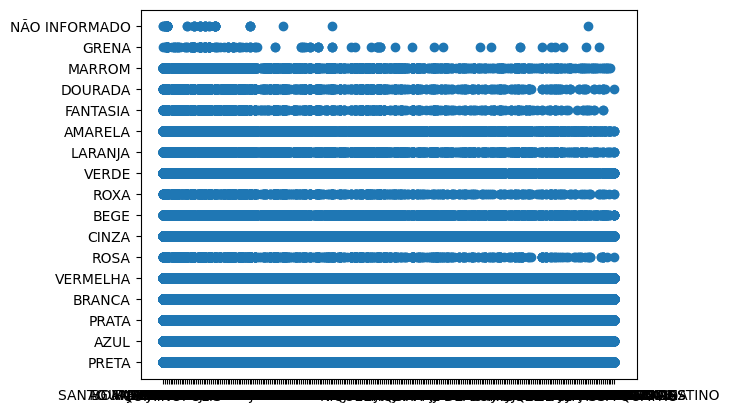

In [35]:
# Será que há uma relação entre a cor do carro e a cidade do indivíduo?

# São muitas cidades e muitas cores, tomemos apenas as 5 cidades e as cinco cores mais comuns.
plt.scatter(df_frota_ativa['MUNICIPIO'], df_frota_ativa['COR'])

In [36]:
maiores_frotas_estado = Counter(df_frota_ativa['MUNICIPIO'])
frotas_ordenadas = sorted(maiores_frotas_estado.items(), key= lambda tupla : tupla[1], reverse= True)

print(frotas_ordenadas)

[('GOIANIA', 5626), ('APARECIDA DE GOIANIA', 3909), ('ANAPOLIS', 3897), ('RIO VERDE', 3407), ('CATALAO', 2900), ('ITUMBIARA', 2789), ('JATAI', 2788), ('SENADOR CANEDO', 2648), ('LUZIANIA', 2602), ('TRINDADE', 2596), ('FORMOSA', 2582), ('CALDAS NOVAS', 2552), ('MINEIROS', 2363), ('GOIANESIA', 2275), ('CRISTALINA', 2131), ('INHUMAS', 2131), ('AGUAS LINDAS DE GOIAS', 2092), ('QUIRINOPOLIS', 2056), ('ITABERAI', 2046), ('URUACU', 2007), ('MORRINHOS', 2004), ('VALPARAISO DE GOIAS', 1989), ('GOIANIRA', 1935), ('GOIATUBA', 1922), ('SANTA HELENA DE GOIAS', 1920), ('PORANGATU', 1907), ('SAO LUIS DE MONTES BELOS', 1843), ('POSSE', 1825), ('IPORA', 1820), ('PIRES DO RIO', 1794), ('NIQUELANDIA', 1747), ('JARAGUA', 1745), ('PALMEIRAS DE GOIAS', 1720), ('NEROPOLIS', 1717), ('PLANALTINA', 1696), ('BELA VISTA DE GOIAS', 1693), ('BOM JESUS', 1662), ('PIRACANJUBA', 1659), ('HIDROLANDIA', 1641), ('NOVO GAMA', 1641), ('CERES', 1620), ('ITAPURANGA', 1594), ('IPAMERI', 1589), ('SAO MIGUEL DO ARAGUAIA', 1584)

In [37]:
# Separando os DataFrames das Cinco maiores fortas do estado.

df_goiania = df_frota_ativa[df_frota_ativa['MUNICIPIO'] == 'GOIANIA']
df_ap = df_frota_ativa[df_frota_ativa['MUNICIPIO'] == 'APARECIDA DE GOIANIA']
df_anapolis = df_frota_ativa[df_frota_ativa['MUNICIPIO'] == 'ANAPOLIS']
df_rio_verde = df_frota_ativa[df_frota_ativa['MUNICIPIO'] == 'RIO VERDE']
df_catalao = df_frota_ativa[df_frota_ativa['MUNICIPIO'] == 'CATALAO']

In [38]:
df_cidades = df_frota_ativa[df_frota_ativa['MUNICIPIO'].isin(['GOIANIA', 'APARECIDA DE GOIANIA', 'ANAPOLIS', 'RIO VERDE', 'CATALAO'])]

# df_cidades_cores = df_cidades[df_cidades['COR'].isin(['BRANCA', 'PRATA', 'PRETA', 'VERMELHA', 'CINZA'])]

In [43]:
df_cidades

,MUNICIPIO,ESPECIE,COR,FABR_ANTES_2000,FABR_2001A2010,FABR_2011A2020,FABR_DEPOIS_2021,COMBUSTIVEL,SITUACAO,QTD
28,CATALAO,AUTOMOVEL,AZUL,0,45,0,0,GASOLINA,Frota Ativa,45
31,GOIANIA,AUTOMOVEL,PRATA,0,7928,0,0,ALCOOL/GASOLINA,Frota Ativa,7928
128,GOIANIA,MOTONETA,ROSA,0,0,99,0,ALCOOL/GASOLINA,Frota Ativa,99
129,GOIANIA,CAMINHONETE,PRATA,0,0,415,0,DIESEL,Frota Ativa,415
161,GOIANIA,REBOQUE,CINZA,0,299,0,0,NAO INFORMADO,Frota Ativa,299
...,...,...,...,...,...,...,...,...,...,...
467689,ANAPOLIS,MICROONIB,BRANCA,0,0,1,0,ALCOOL/GASOLINA,Frota Ativa,1
467835,RIO VERDE,CAMINHONETE,LARANJA,0,1,0,0,ALCOOL/GASOLINA,Frota Ativa,1
467848,GOIANIA,REBOQUE,DOURADA,0,0,0,1,NAO INFORMADO,Frota Ativa,1
467849,CATALAO,CAMINHAO TRATOR,AZUL,0,1,0,0,DIESEL,Frota Ativa,1


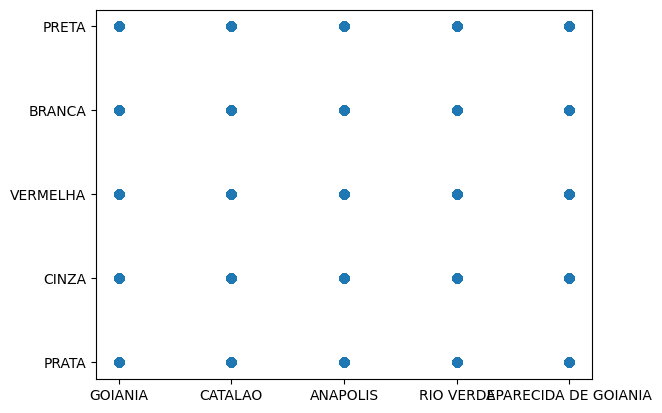

In [39]:
# plt.scatter(df_cidades_cores['MUNICIPIO'], df_cidades_cores['COR'])

In [41]:
df_cidades_cores.head()

,MUNICIPIO,ESPECIE,COR,FABR_ANTES_2000,FABR_2001A2010,FABR_2011A2020,FABR_DEPOIS_2021,COMBUSTIVEL,SITUACAO,QTD
31,GOIANIA,AUTOMOVEL,PRATA,0,7928,0,0,ALCOOL/GASOLINA,Frota Ativa,7928
129,GOIANIA,CAMINHONETE,PRATA,0,0,415,0,DIESEL,Frota Ativa,415
161,GOIANIA,REBOQUE,CINZA,0,299,0,0,NAO INFORMADO,Frota Ativa,299
183,GOIANIA,CAMINHONETE,VERMELHA,0,3,0,0,GASOLINA,Frota Ativa,3
202,GOIANIA,CAMINHONETE,BRANCA,0,586,0,0,ALCOOL/GASOLINA,Frota Ativa,586
226,CATALAO,REBOQUE,CINZA,0,0,79,0,NAO INFORMADO,Frota Ativa,79
277,ANAPOLIS,AUTOMOVEL,PRATA,0,2864,0,0,ALCOOL/GASOLINA,Frota Ativa,2864
284,RIO VERDE,REBOQUE,PRATA,0,0,25,0,NAO INFORMADO,Frota Ativa,25
286,RIO VERDE,CAMINHAO,VERMELHA,0,9,0,0,DIESEL,Frota Ativa,9
315,APARECIDA DE GOIANIA,AUTOMOVEL,PRETA,0,2172,0,0,ALCOOL/GASOLINA,Frota Ativa,2172


In [42]:
df_cidades_cores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12441 entries, 31 to 467689
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MUNICIPIO         12441 non-null  object
 1   ESPECIE           12441 non-null  object
 2   COR               12441 non-null  object
 3   FABR_ANTES_2000   12441 non-null  int64 
 4   FABR_2001A2010    12441 non-null  int64 
 5   FABR_2011A2020    12441 non-null  int64 
 6   FABR_DEPOIS_2021  12441 non-null  int64 
 7   COMBUSTIVEL       12441 non-null  object
 8   SITUACAO          12441 non-null  object
 9   QTD               12441 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.0+ MB
